# Effect of Job Title on Average Salaries of Data Science Professions

In [1]:
# Import Libraries
library(cowplot)
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(RCurl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete




## Introduction

With the rising importance of big data and the ability to process it, the data science industry can generate millions of dollars in revenue. As such, people who work in these positions have high salaries. However, "data science" encompasses many different professions, such as data scientists, data engineers, and data analysts. Despite working with similar tools and knowledge, different professions can have different salaries. Past studies have found that the job title sets an initial expectation for the value of the job itself and controlling for it could mediate the variation in salaries amongst industry professionals, suggesting that a small difference in a job title can affect its salary, even if the work done is similar to other titles (Smith et al., 1989, Gerhart, 1990). This leads to the question: Is there a significant difference among the average salaries of different data science job titles?

---

## Preliminary Results

For our preliminary analysis, we will look at the sample distribution of all data science job titles, and then the sample distribution for the titles we're interested in using histograms and boxplots.

In [2]:
# load dataset from web
ds_df <- read_csv("https://raw.githubusercontent.com/erliuu/STAT-201-Group-48/main/datascience.csv")
names(ds_df) <- make.names(names(ds_df), unique=TRUE)

# Remove Job Description Column for visual purposes (due to length)
head(ds_df)[-c(4)]

Rows: 742 Columns: 42
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): Job Title, Salary Estimate, Job Description, Company Name, Locatio...
dbl (25): index, Rating, Founded, Hourly, Employer provided, Lower Salary, U...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,Job.Title,Salary.Estimate,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,⋯,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research 3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,⋯,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System 3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,⋯,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4 4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,⋯,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL 3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,⋯,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions 2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,⋯,0,0,0,0,0,0,0,data scientist,na,na
5,Data Scientist,$71K-$119K (Glassdoor est.),3.4,CyrusOne 3.4,"Dallas, TX","Dallas, TX",201 - 500,2000,Company - Public,⋯,0,0,0,1,0,1,0,data scientist,na,na


In [3]:
# Subset & Clean
trim_df <- ds_df %>%
    select(Avg.Salary.K., job_title_sim) %>%
    rename(Avg_Salary=Avg.Salary.K., Job_Title=job_title_sim) %>%
    filter(Job_Title != "na")
head(trim_df)

Avg_Salary,Job_Title
<dbl>,<chr>
72.0,data scientist
87.5,data scientist
85.0,data scientist
76.5,data scientist
114.5,data scientist
95.0,data scientist


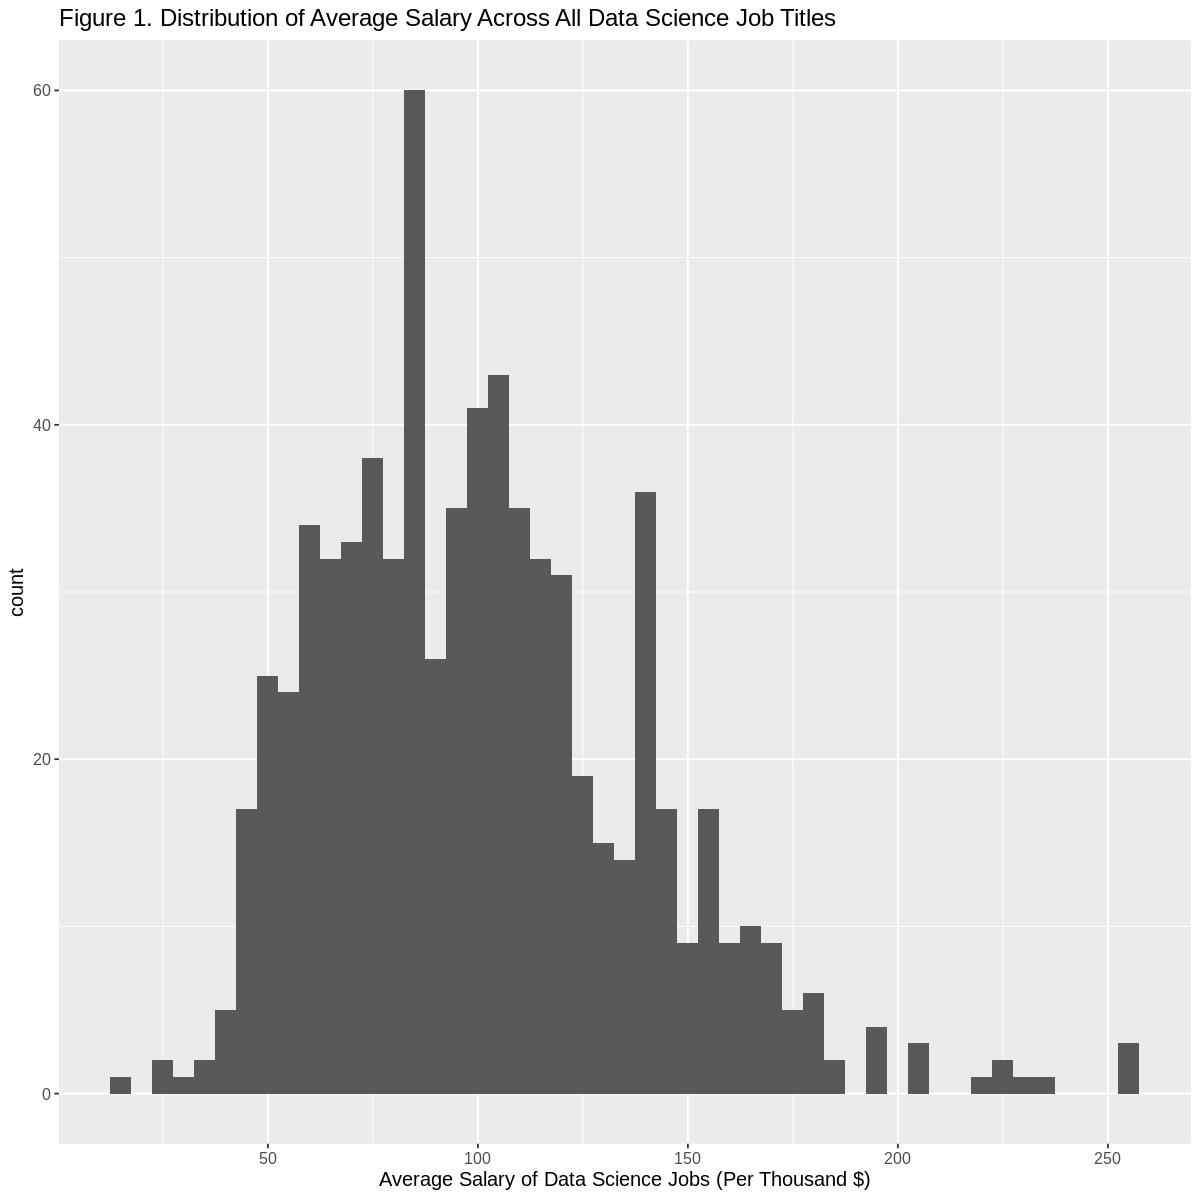

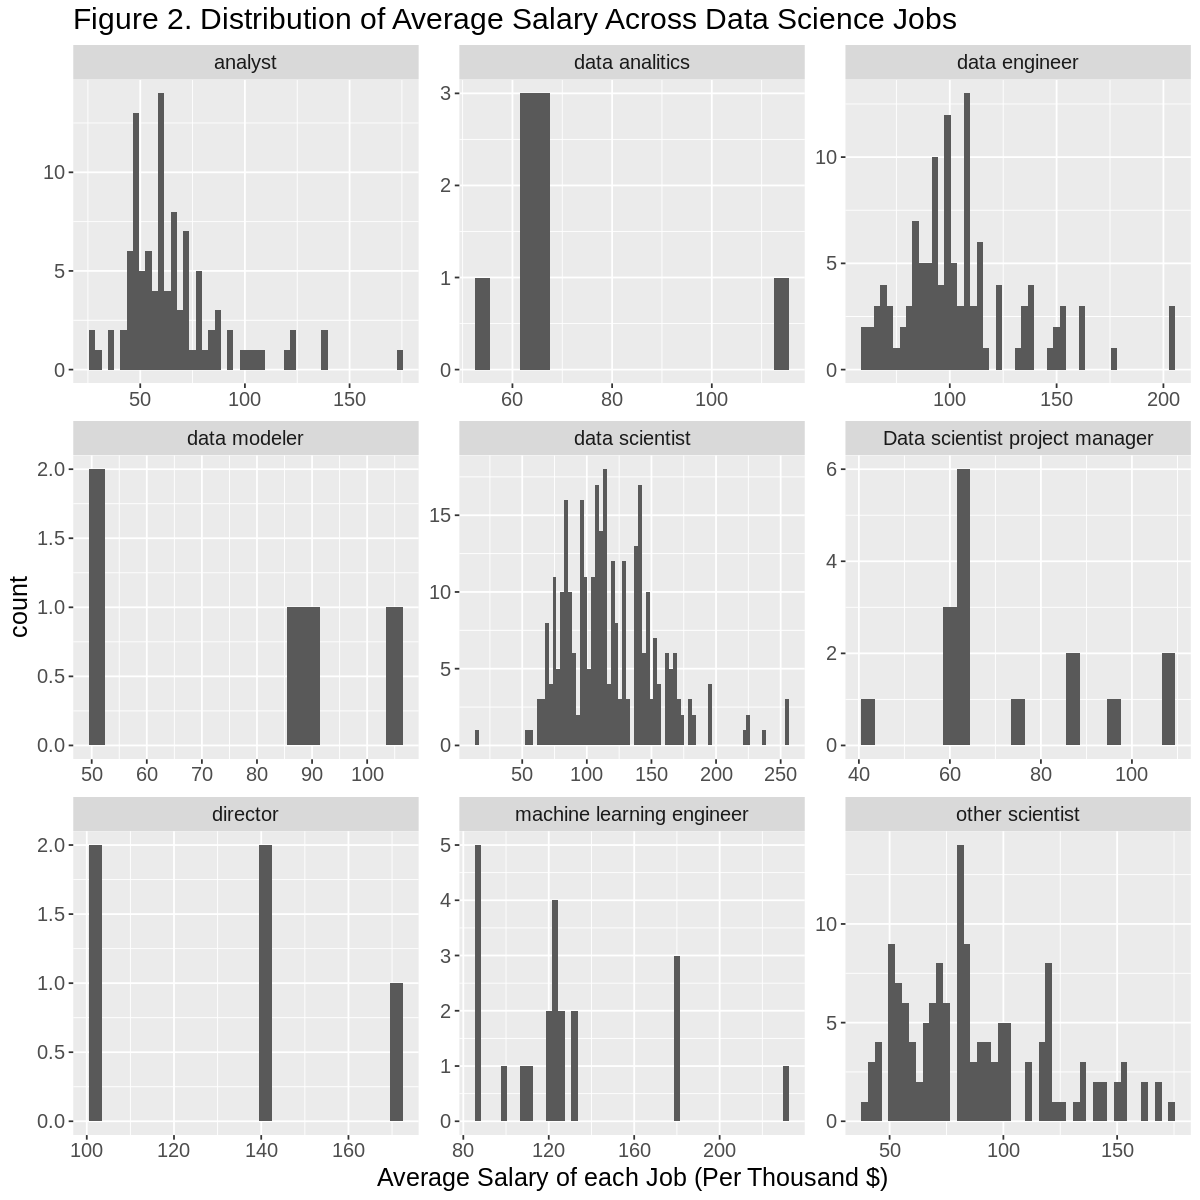

In [4]:
# Histogram of Average Salaries of ALL job titles
options(repr.plot.width=10, repr.plot.height=10)
ggplot(trim_df) +
    geom_histogram(aes(x = Avg_Salary), binwidth = 5) +
    xlab("Average Salary of Data Science Jobs (Per Thousand $)") +
    ggtitle("Figure 1. Distribution of Average Salary Across All Data Science Job Titles") + 
    theme(text = element_text(size=12))

# Plotting each Distribution
options(repr.plot.width=10, repr.plot.height=10)
p1 <- ggplot(trim_df) +
    geom_histogram(aes(x = Avg_Salary), binwidth = 3) +
    xlab("Average Salary of each Job (Per Thousand $)") +
    ggtitle("Figure 2. Distribution of Average Salary Across Data Science Jobs") + 
    facet_wrap(~Job_Title, scale="free") +
    theme(text = element_text(size=15))
plot(p1)

After assessing the distribution, for our project we decided to choose 3 common job titles in the industry in which their sample sizes are sufficiently large (Fig.2). The chosen ones are:
1. `data scientist`
2. `analyst`
3. `data engineer`

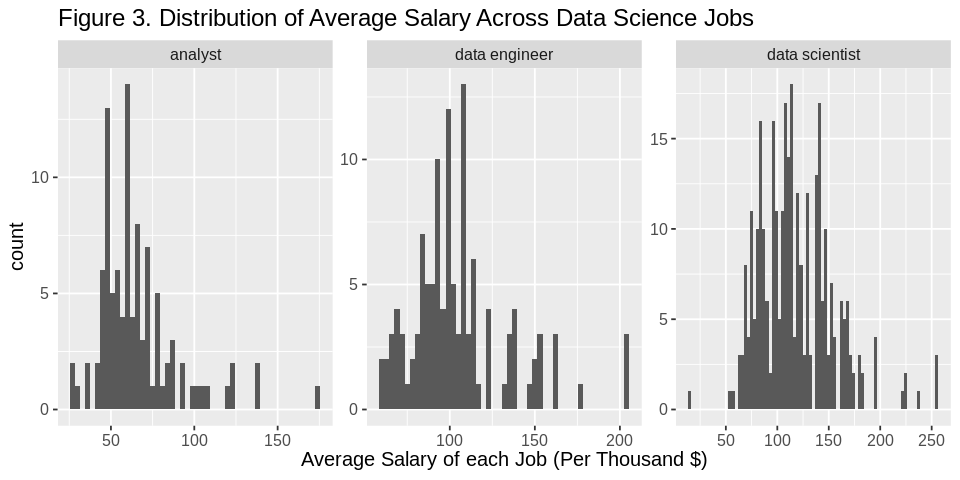

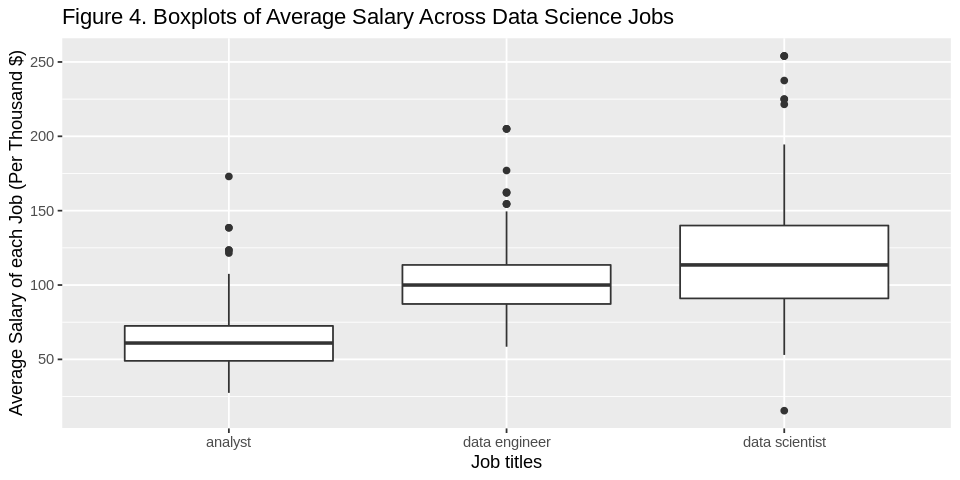

In [5]:
# Filter the dataset to only keep the necessary data
keep_jobs <- c('data scientist', 'analyst', 'data engineer')
subset_df <- trim_df %>%
    filter(Job_Title %in% keep_jobs)

# Plotting each Distribution
options(repr.plot.width=8, repr.plot.height=4)
p2 <- ggplot(subset_df) +
    geom_histogram(aes(x = Avg_Salary), binwidth = 3) +
    xlab("Average Salary of each Job (Per Thousand $)") +
    ggtitle("Figure 3. Distribution of Average Salary Across Data Science Jobs") + 
    facet_wrap(~Job_Title, scale="free") +
    theme(text = element_text(size=12))
plot(p2)

# Plotting a boxplot of sample distribution of different job title categories
p_box <- ggplot(subset_df, aes(x = Job_Title, y = Avg_Salary)) +
        geom_boxplot() + 
    labs(x = "Job titles", 
         y = "Average Salary of each Job (Per Thousand $)",
         title = "Figure 4. Boxplots of Average Salary Across Data Science Jobs") 
p_box

In [6]:
# Putting the non-bootstrapped summary statistic estimates in a table:
table <- subset_df %>%
    group_by(Job_Title) %>% summarize(mean = mean(Avg_Salary),
                                      std_dev = sd(Avg_Salary),
                                      n=n())
    
table

Job_Title,mean,std_dev,n
<chr>,<dbl>,<dbl>,<int>
analyst,66.11386,24.32559,101
data engineer,105.40336,29.20415,119
data scientist,118.29393,35.86401,313


## Methods (Plan)

To answer our question, we will calculate the mean average salary for each job title, dub them $\mu_1$ (data scientist), $\mu_2$ (data engineer), $\mu_3$ (analyst) and test the following hypotheses:
- Null hypothesis: $\mu_1 = \mu_2 = \mu_3$
- Alternative hypothesis: At least one group's mean salary is different from the rest

To test our hypothesis, one-way ANOVA will be used to see if there's any difference between the mean average salaries of 3 levels of the categorical factor Job_title at 5% significance level. Since the sample distributions have various degrees of right skews and thus are not exactly normal, we will use bootstrapping to approximate their sampling distributions on the mean average salaries, and use the summary statistics from those approximations instead. Pairwise comparisons will then be used to quantify the differences in mean average salary between each group pair in order to highlight the difference using 95% confidence intervals.

For visualization, we will be using boxplots due to its versatility to plot multiple distribution at once and display certain statistics such as mean and standard deviation. Additionally, we will be plotting each group and the overall data in histograms to examine the distribution in more details.

## Expected Outcomes:

Based on the results of preliminary analysis, the mean average salaries of data scientists and data engineers are more similar to each other whereas that of analyst's seems to be quite different from the others (Fig.3-4, Table 1). Along with the findings of previous studies, we expect that different data science job titles do not have the same mean salary. We also expect the differences between data scientist and analyst, data engineer and analyst to be statistically significant in pairwise comparisons.

## Significance & Impact:

Our findings could provide a point of reference for people who want to search for jobs in the data science industry, with further implications of potential certain data science job titles are underpaid or overpaid with the assumption that the job titles being compared do perform very similar tasks in real life.

## Future Questions:

Since this project only focuses on the comparison of different job titles' mean salaries, there are other factors that could also play a role in determining the mean salary of the job. Therefore, those factors could also be included in future analysis. For example, we could look at whether the average salary differs within each job title based on the size and location of the company.

## References

- Smith, Brien N., et al. “What Is in a Name: The Impact of Job Titles on Job Evaluation Results.” Journal of Business and Psychology, vol. 3, no. 3, 1989, pp. 341–51. JSTOR, http://www.jstor.org/stable/25092192. Accessed 9 Mar. 2023.
- Gerhart, B. (1990). Gender Differences in Current and Starting Salaries: The Role of Performance, College Major, and Job Title. ILR Review, 43(4), 418–433. https://doi.org/10.1177/001979399004300406